<a href="https://colab.research.google.com/github/praveen-221/Age-Gender-Emotion-prediction-using-Audio/blob/main/ML_project_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Emotion Classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/cleaned-dataset/cleaned_emotion.csv")
# data = pd.read_csv("/content/drive/MyDrive/cleaned_emotion.csv")
# data = pd.read_csv("cleaned_emotion.csv")
data

,Unnamed: 0.1,Unnamed: 0,X,meanfreq,sd,median,Q25,Q75,IQR,skew,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0,1,1,0.181338,0.060495,0.187476,0.126197,0.233586,0.107389,0.869088,...,0.181338,0.137742,0.023022,0.271186,0.777344,0.085938,6.226562,6.140625,0.116586,sad
1,1,2,2,0.186897,0.062260,0.195070,0.130847,0.243987,0.113140,1.191767,...,0.186897,0.121811,0.018412,0.271186,0.930339,0.085938,4.000000,3.914062,0.144983,sad
2,2,3,3,0.189102,0.062901,0.204945,0.131422,0.249978,0.118556,1.312690,...,0.189102,0.123758,0.083333,0.262295,0.332386,0.085938,0.625000,0.539062,0.334783,sad
3,4,5,5,0.183036,0.060051,0.174115,0.129949,0.236967,0.107017,1.096409,...,0.183036,0.128469,0.044693,0.258065,1.012019,0.085938,5.468750,5.382812,0.304910,sad
4,5,6,6,0.168793,0.057910,0.156266,0.116783,0.216326,0.099543,1.386837,...,0.168793,0.109720,0.022472,0.235294,0.228795,0.093750,0.750000,0.656250,0.306777,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,1243,1244,1436,0.244013,0.035477,0.254385,0.229653,0.265573,0.035920,2.214752,...,0.244013,0.202433,0.028829,0.271186,0.616536,0.210938,1.609375,1.398438,0.281869,happy
905,1244,1245,1437,0.235383,0.045303,0.248974,0.220745,0.264233,0.043488,2.474743,...,0.235383,0.189293,0.031250,0.275862,1.115723,0.265625,5.500000,5.234375,0.167861,happy
906,1245,1246,1438,0.231211,0.044793,0.234847,0.221477,0.262090,0.040613,2.607668,...,0.231211,0.171805,0.022346,0.275862,1.070801,0.265625,4.554688,4.289062,0.214936,happy
907,1246,1247,1439,0.213587,0.082267,0.249435,0.207680,0.268538,0.060858,3.460579,...,0.213587,0.155277,0.020592,0.275862,1.724888,0.273438,6.812500,6.539062,0.238857,happy


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data.label = le.fit_transform(data.label)
data

,Unnamed: 0.1,Unnamed: 0,X,meanfreq,sd,median,Q25,Q75,IQR,skew,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0,1,1,0.181338,0.060495,0.187476,0.126197,0.233586,0.107389,0.869088,...,0.181338,0.137742,0.023022,0.271186,0.777344,0.085938,6.226562,6.140625,0.116586,2
1,1,2,2,0.186897,0.062260,0.195070,0.130847,0.243987,0.113140,1.191767,...,0.186897,0.121811,0.018412,0.271186,0.930339,0.085938,4.000000,3.914062,0.144983,2
2,2,3,3,0.189102,0.062901,0.204945,0.131422,0.249978,0.118556,1.312690,...,0.189102,0.123758,0.083333,0.262295,0.332386,0.085938,0.625000,0.539062,0.334783,2
3,4,5,5,0.183036,0.060051,0.174115,0.129949,0.236967,0.107017,1.096409,...,0.183036,0.128469,0.044693,0.258065,1.012019,0.085938,5.468750,5.382812,0.304910,2
4,5,6,6,0.168793,0.057910,0.156266,0.116783,0.216326,0.099543,1.386837,...,0.168793,0.109720,0.022472,0.235294,0.228795,0.093750,0.750000,0.656250,0.306777,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,1243,1244,1436,0.244013,0.035477,0.254385,0.229653,0.265573,0.035920,2.214752,...,0.244013,0.202433,0.028829,0.271186,0.616536,0.210938,1.609375,1.398438,0.281869,1
905,1244,1245,1437,0.235383,0.045303,0.248974,0.220745,0.264233,0.043488,2.474743,...,0.235383,0.189293,0.031250,0.275862,1.115723,0.265625,5.500000,5.234375,0.167861,1
906,1245,1246,1438,0.231211,0.044793,0.234847,0.221477,0.262090,0.040613,2.607668,...,0.231211,0.171805,0.022346,0.275862,1.070801,0.265625,4.554688,4.289062,0.214936,1
907,1246,1247,1439,0.213587,0.082267,0.249435,0.207680,0.268538,0.060858,3.460579,...,0.213587,0.155277,0.020592,0.275862,1.724888,0.273438,6.812500,6.539062,0.238857,1


In [ ]:
data.groupby("label").mean()

,Unnamed: 0.1,Unnamed: 0,X,meanfreq,sd,median,Q25,Q75,IQR,skew,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,,
0,630.807947,631.807947,727.569536,0.205438,0.053801,0.213600,0.177098,0.245521,0.068423,2.069180,...,0.229475,0.205438,0.168414,0.032070,0.261265,0.953169,0.138504,4.831540,4.693036,0.209339
1,630.232082,631.232082,727.559727,0.213543,0.050871,0.221871,0.189249,0.250664,0.061415,2.108632,...,0.234947,0.213543,0.173733,0.030681,0.262906,0.731017,0.143345,3.702565,3.559220,0.214665
2,586.525478,587.525478,675.703822,0.199993,0.049222,0.202768,0.166948,0.237979,0.071031,2.108291,...,0.199341,0.199993,0.157575,0.033649,0.253872,0.692811,0.108753,4.127787,4.019034,0.189594


In [ ]:
X = data.drop("label", axis="columns")
X

,Unnamed: 0.1,Unnamed: 0,X,meanfreq,sd,median,Q25,Q75,IQR,skew,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0,1,1,0.181338,0.060495,0.187476,0.126197,0.233586,0.107389,0.869088,...,0.216901,0.181338,0.137742,0.023022,0.271186,0.777344,0.085938,6.226562,6.140625,0.116586
1,1,2,2,0.186897,0.062260,0.195070,0.130847,0.243987,0.113140,1.191767,...,0.135648,0.186897,0.121811,0.018412,0.271186,0.930339,0.085938,4.000000,3.914062,0.144983
2,2,3,3,0.189102,0.062901,0.204945,0.131422,0.249978,0.118556,1.312690,...,0.264070,0.189102,0.123758,0.083333,0.262295,0.332386,0.085938,0.625000,0.539062,0.334783
3,4,5,5,0.183036,0.060051,0.174115,0.129949,0.236967,0.107017,1.096409,...,0.152032,0.183036,0.128469,0.044693,0.258065,1.012019,0.085938,5.468750,5.382812,0.304910
4,5,6,6,0.168793,0.057910,0.156266,0.116783,0.216326,0.099543,1.386837,...,0.153764,0.168793,0.109720,0.022472,0.235294,0.228795,0.093750,0.750000,0.656250,0.306777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,1243,1244,1436,0.244013,0.035477,0.254385,0.229653,0.265573,0.035920,2.214752,...,0.263807,0.244013,0.202433,0.028829,0.271186,0.616536,0.210938,1.609375,1.398438,0.281869
905,1244,1245,1437,0.235383,0.045303,0.248974,0.220745,0.264233,0.043488,2.474743,...,0.262961,0.235383,0.189293,0.031250,0.275862,1.115723,0.265625,5.500000,5.234375,0.167861
906,1245,1246,1438,0.231211,0.044793,0.234847,0.221477,0.262090,0.040613,2.607668,...,0.233333,0.231211,0.171805,0.022346,0.275862,1.070801,0.265625,4.554688,4.289062,0.214936
907,1246,1247,1439,0.213587,0.082267,0.249435,0.207680,0.268538,0.060858,3.460579,...,0.275088,0.213587,0.155277,0.020592,0.275862,1.724888,0.273438,6.812500,6.539062,0.238857


In [ ]:
y = data.label
y

0      2
1      2
2      2
3      2
4      2
      ..
904    1
905    1
906    1
907    1
908    1
Name: label, Length: 909, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_) #ChiSquare value of each feature with respect to y
#Higher the chisquare value, more is its contribution/ more valuable is the feature for predicting y
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(20,'Score')) #Choosing the 20 most valuable features

           Specs       Score
2              X  778.965580
0   Unnamed: 0.1  646.718122
1     Unnamed: 0  645.668809
21       dfrange   47.360667
20        maxdom   45.931945
18       meandom   15.188191
19        mindom    1.662152
12           sfm    1.108978
13          mode    1.023218
22       modindx    0.524163
6            Q25    0.425080
5         median    0.262721
15       meanfun    0.249059
8            IQR    0.221394
9           skew    0.148467
3       meanfreq    0.136156
14      centroid    0.136156
7            Q75    0.101386
10          kurt    0.092138
4             sd    0.064347


In [ ]:
l = featureScores.nlargest(16,'Score')['Specs']
print(l)
x_new = X[l]

2                X
0     Unnamed: 0.1
1       Unnamed: 0
21         dfrange
20          maxdom
18         meandom
19          mindom
12             sfm
13            mode
22         modindx
6              Q25
5           median
15         meanfun
8              IQR
9             skew
3         meanfreq
Name: Specs, dtype: object


In [ ]:
x_new.columns

Index(['X', 'Unnamed: 0.1', 'Unnamed: 0', 'dfrange', 'maxdom', 'meandom',
       'mindom', 'sfm', 'mode', 'modindx', 'Q25', 'median', 'meanfun', 'IQR',
       'skew', 'meanfreq'],
      dtype='object')

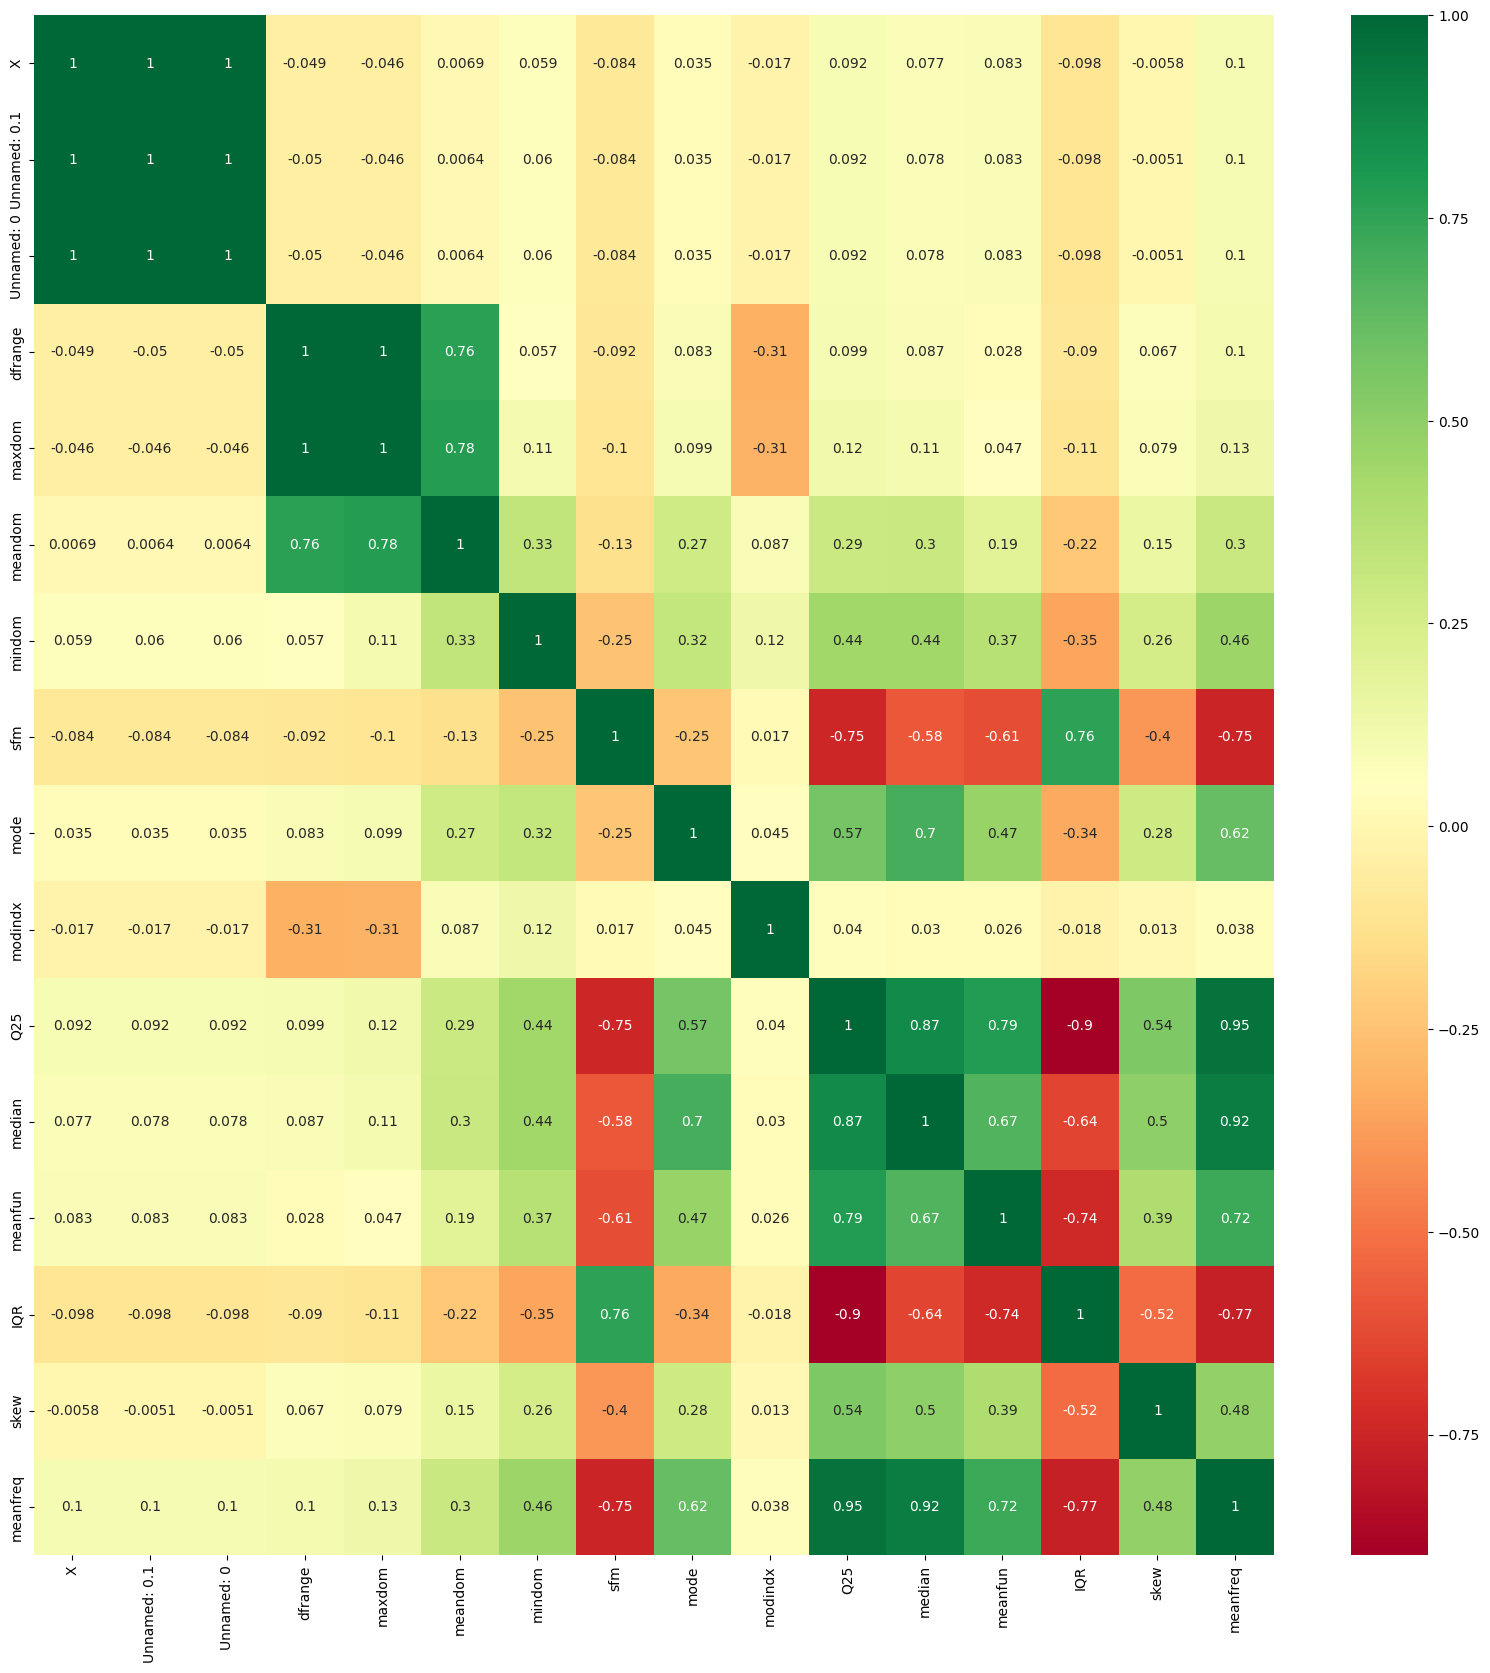

In [ ]:
corrmat = x_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(x_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In above heatmap we can see that 'X', 'Unnamed 0.1',  and 'Unnamed: 0' has correlation value of 1 and same for 'dfrange' and 'maxdom'. So we drop columns 'Unnamed 0.1', 'Unnamed: 0' and 'maxdom'

In [ ]:
x_new = x_new[['X', 'dfrange', 'meandom',
       'mindom', 'sfm', 'mode', 'modindx', 'Q25', 'median', 'meanfun', 'IQR',
       'skew', 'meanfreq']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=1)
print(len(X_train), len(X_test))

636 273


**Decision Tree:**

In [ ]:
TreeModel = tree.DecisionTreeClassifier()
TreeModel.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print(TreeModel.score(X_train, y_train))
print(TreeModel.score(X_test, y_test))

1.0
0.4981684981684982


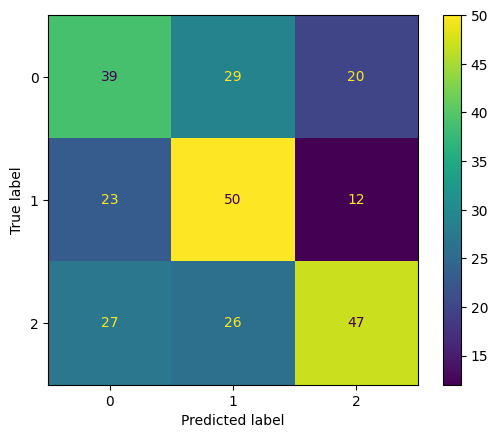

In [ ]:
y_pred = TreeModel.predict(X_test)
# y_temp = TreeModel.predict(X_train)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
# cm = confusion_matrix(y_train, y_temp)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='micro'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='micro'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.498
precision: 0.498
recall: 0.498
f1: 0.498


**Random Forest Classification:**

In [ ]:
RFModel = RandomForestClassifier()
RFModel.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = RFModel.predict(X_test)

In [ ]:
print(RFModel.score(X_train, y_train))
print(RFModel.score(X_test, y_test))

1.0
0.5824175824175825


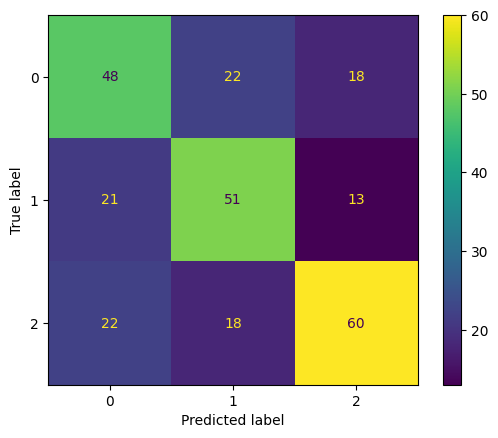

In [ ]:
y_pred = RFModel.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.582
precision: 0.586
recall: 0.582
f1: 0.582


**SVM:**

In [ ]:
SVMClassifier = SVC(gamma=0.001, C=0.5)
SVMClassifier.fit(X_train, y_train)

SVC(C=0.5, gamma=0.001)

In [ ]:
print(SVMClassifier.score(X_train, y_train))
print(SVMClassifier.score(X_test, y_test))

0.6053459119496856
0.4175824175824176


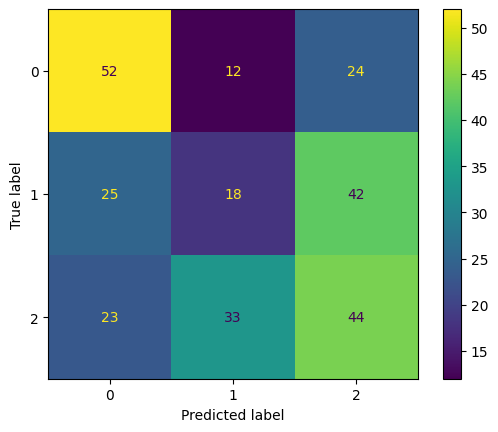

In [ ]:
y_pred = SVMClassifier.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.418
precision: 0.403
recall: 0.418
f1: 0.418


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8522012578616353
0.663003663003663


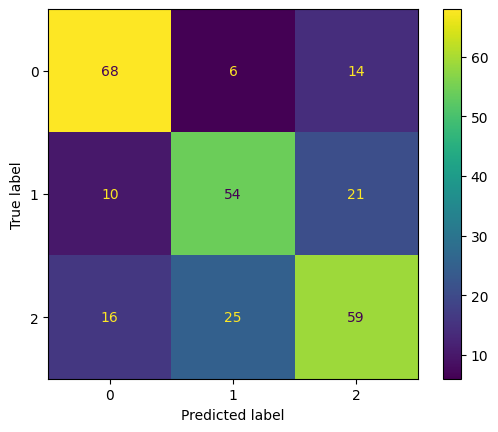

In [ ]:
y_pred = knn.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.663
precision: 0.661
recall: 0.663
f1: 0.663


XGB:

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

1.0
0.6446886446886447


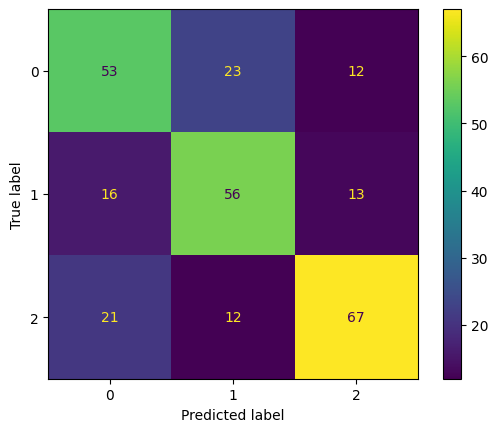

In [ ]:
y_pred = xgb.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.645
precision: 0.648
recall: 0.645
f1: 0.645


ANN:

In [ ]:
import tensorflow as tf
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 291.4480 - accuracy: 0.3365
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 230.6390 - accuracy: 0.3365
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 173.7476 - accuracy: 0.3365
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 118.7833 - accuracy: 0.3365
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 66.0581 - accuracy: 0.3365
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 14.3206 - accuracy: 0.3459
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0316 - accuracy: 0.3270
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1000 - accuracy: 0.3270
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0030 - accuracy: 0.3270
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7995 - accuracy: 0.3270

In [ ]:
print(ann.evaluate(X_train, y_train))
print(ann.evaluate(X_test, y_test))

20/20 [==============================] - 0s 2ms/step - loss: -0.0904 - accuracy: 0.3270
[-0.09036672115325928, 0.3270440399646759]
9/9 [==============================] - 0s 3ms/step - loss: -0.2640 - accuracy: 0.3114
[-0.2639559805393219, 0.311355322599411]


9/9 [==============================] - 0s 2ms/step


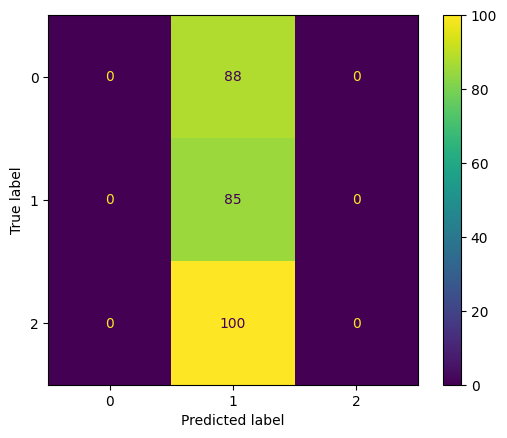

In [ ]:
y_pred = ann.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.311
precision: 0.097
recall: 0.311
f1: 0.311


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes:

In [ ]:
from sklearn.naive_bayes  import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))

0.5
0.5494505494505495


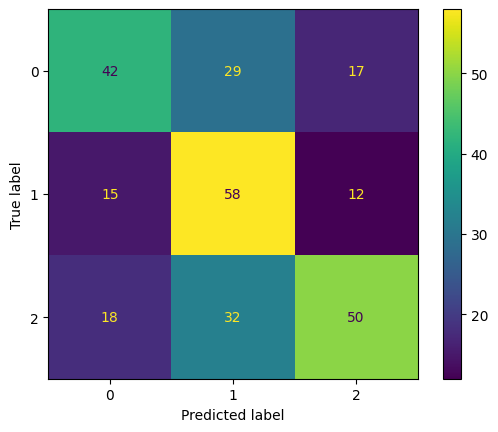

In [ ]:
y_pred = nb.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.549
precision: 0.564
recall: 0.549
f1: 0.549


catBoost

In [ ]:
!pip install catboost
from catboost  import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.5 MB/s eta 0:00:00


In [ ]:
cb=CatBoostClassifier()
cb.fit(X_train,y_train)

Learning rate set to 0.077321
0:	learn: 1.0786934	total: 57ms	remaining: 56.9s
1:	learn: 1.0639643	total: 64.8ms	remaining: 32.3s
2:	learn: 1.0488592	total: 79.1ms	remaining: 26.3s
3:	learn: 1.0346341	total: 94.4ms	remaining: 23.5s
4:	learn: 1.0203396	total: 102ms	remaining: 20.4s
5:	learn: 1.0033652	total: 110ms	remaining: 18.2s
6:	learn: 0.9907383	total: 118ms	remaining: 16.7s
7:	learn: 0.9799473	total: 125ms	remaining: 15.5s
8:	learn: 0.9708431	total: 137ms	remaining: 15.1s
9:	learn: 0.9588271	total: 144ms	remaining: 14.3s
10:	learn: 0.9483516	total: 152ms	remaining: 13.7s
11:	learn: 0.9414113	total: 160ms	remaining: 13.2s
12:	learn: 0.9306582	total: 168ms	remaining: 12.7s
13:	learn: 0.9231503	total: 176ms	remaining: 12.4s
14:	learn: 0.9156958	total: 184ms	remaining: 12.1s
15:	learn: 0.9067134	total: 192ms	remaining: 11.8s
16:	learn: 0.8986771	total: 203ms	remaining: 11.7s
17:	learn: 0.8895258	total: 211ms	remaining: 11.5s
18:	learn: 0.8826693	total: 219ms	remaining: 11.3s
19:	learn

In [ ]:
print(cb.score(X_train, y_train))
print(cb.score(X_test, y_test))

1.0
0.6117216117216118


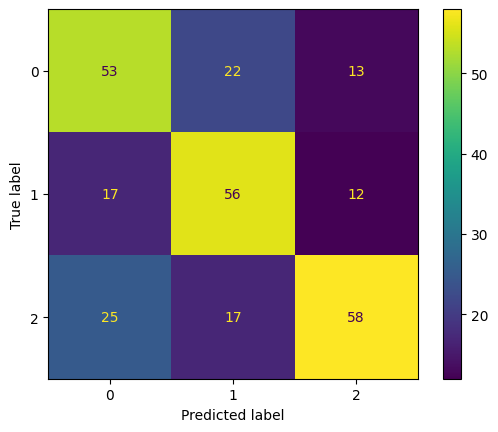

In [ ]:
y_pred = cb.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.612
precision: 0.619
recall: 0.612
f1: 0.612


Gradient Boosting:

In [ ]:
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.metrics import classification_report
gb=GradientBoostingClassifier(learning_rate=0.1)
gb.fit(X_train,y_train)
print(classification_report(y_test,gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.58      0.58        88
           1       0.57      0.64      0.60        85
           2       0.72      0.64      0.68       100

    accuracy                           0.62       273
   macro avg       0.62      0.62      0.62       273
weighted avg       0.63      0.62      0.62       273



In [ ]:
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))

0.5
0.5494505494505495


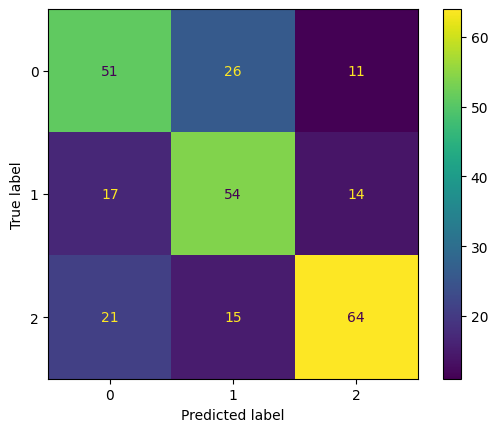

In [ ]:
y_pred = gb.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.619
precision: 0.625
recall: 0.619
f1: 0.619


AdaBoost

In [ ]:
from sklearn.ensemble  import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
print(ab.score(X_train, y_train))
print(ab.score(X_test, y_test))

0.6792452830188679
0.5421245421245421


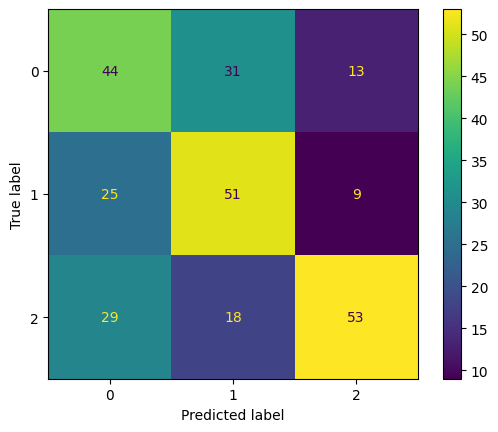

In [ ]:
y_pred = ab.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.542
precision: 0.562
recall: 0.542
f1: 0.542


CNN

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import numpy as np
X2=np.array(X_train)
X3=np.array(X_test)
X_train2=X2.reshape(X_train.shape[0],X_train.shape[1],1)
X_test2=X3.reshape(X_test.shape[0],X_test.shape[1],1)


In [ ]:
X_test.shape

(273, 13)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Embedding,Dense,Flatten,MaxPooling1D,Conv1D,BatchNormalization,Dropout
# import model
model20=Sequential()
# layers
model20.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train2[0].shape)) #creates a convolutional layer which extracts features from the input
model20.add(BatchNormalization()) #normalizes each feature for better accuracy and faster training
model20.add(Dropout(0.2)) # hides 20% neurons to avoid overfitting

model20.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model20.add(BatchNormalization())
model20.add(Dropout(0.5))

model20.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model20.add(BatchNormalization())
model20.add(Dropout(0.5))

model20.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model20.add(BatchNormalization())
model20.add(Dropout(0.25))

model20.add(Flatten()) #convert input into 1D
model20.add(Dense(64, activation='relu')) #fully connected layer for classification
model20.add(Dropout(0.25))

model20.add(Dense(100, activation='relu'))
model20.add(Dense(50, activation='relu'))
model20.add(Dense(25, activation='relu'))
model20.add(Dense(1, activation = "sigmoid"))

In [ ]:
model20.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 12, 32)            96        
                                                                 
 batch_normalization_2 (Batc  (None, 12, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 12, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 11, 64)            4160      
                                                                 
 batch_normalization_3 (Batc  (None, 11, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 11, 64)           

In [ ]:
model20.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model20.fit(X_train2,y_train,epochs=80,validation_data=(X_test2,y_test))

Epoch 1/80
20/20 [==============================] - 1s 47ms/step - loss: -640627776.0000 - accuracy: 0.3333 - val_loss: -1000440768.0000 - val_accuracy: 0.3114
Epoch 2/80
20/20 [==============================] - 1s 38ms/step - loss: -851220480.0000 - accuracy: 0.3428 - val_loss: -571091968.0000 - val_accuracy: 0.3114
Epoch 3/80
20/20 [==============================] - 1s 25ms/step - loss: -988769664.0000 - accuracy: 0.3333 - val_loss: -1087604352.0000 - val_accuracy: 0.3114
Epoch 4/80
20/20 [==============================] - 1s 27ms/step - loss: -1219772160.0000 - accuracy: 0.3459 - val_loss: -1279017216.0000 - val_accuracy: 0.3114
Epoch 5/80
20/20 [==============================] - 0s 25ms/step - loss: -1401345792.0000 - accuracy: 0.3396 - val_loss: -872837120.0000 - val_accuracy: 0.3114
Epoch 6/80
20/20 [==============================] - 0s 24ms/step - loss: -1759938560.0000 - accuracy: 0.3239 - val_loss: -1026876608.0000 - val_accuracy: 0.3114
Epoch 7/80
20/20 [=====================

In [ ]:
def plot_learningcurve(history,epochs):
  epoch=range(1,epochs+1)
  # accuracy
  plt.plot(epoch, history.history['accuracy'])
  plt.plot(epoch, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, history.history['loss'])
  plt.plot(epoch, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

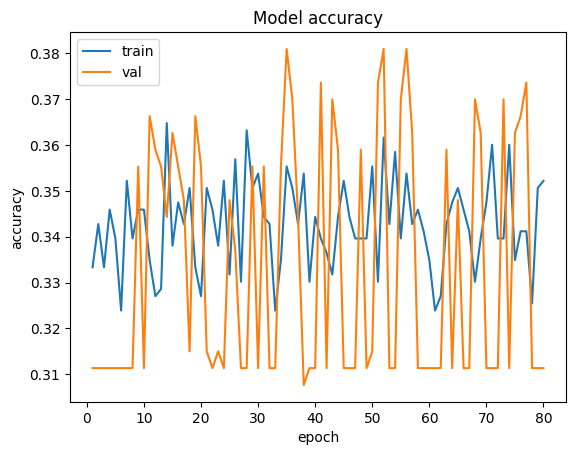

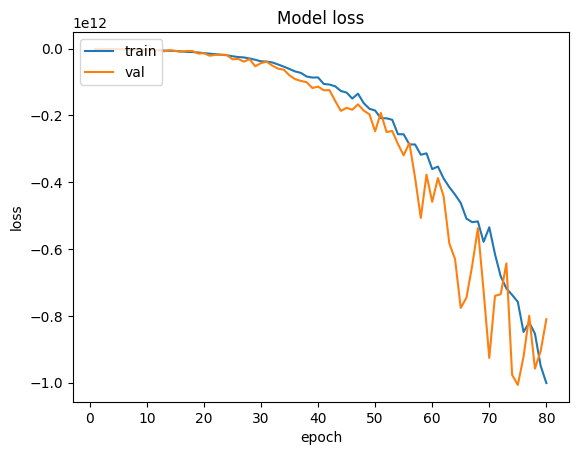

In [ ]:
plot_learningcurve(history,80)

In [ ]:
c=model20.evaluate(X_test2,y_test)

9/9 [==============================] - 0s 4ms/step - loss: -810168811520.0000 - accuracy: 0.3114


In [ ]:
pred = (model20.predict(X_test2))
res = []
for ele in pred:
  if(ele < 0.5):
    res.append(0)
  else:
    res.append(1)
print(classification_report(y_test, res))

9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.31      1.00      0.47        85
           2       0.00      0.00      0.00       100

    accuracy                           0.31       273
   macro avg       0.10      0.33      0.16       273
weighted avg       0.10      0.31      0.15       273

